In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data/ArchiveII.csv')
df_ = df.query('len <= 128')
df_

,id,sequence,structure,base_pairs,len
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115
3,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75
5,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128
6,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111
...,...,...,...,...,...
3857,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120
3859,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114
3860,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88
3862,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120


In [5]:
print('No max len')
print(df['id'].str.split('_').str[0].value_counts())
print('Max len = 128')
print(df_['id'].str.split('_').str[0].value_counts())

No max len
id
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64
Max len = 128
id
5s        1269
tRNA       557
srp        494
16s          4
tmRNA        1
RNaseP       1
Name: count, dtype: int64


In [30]:
df_['fam'] = df_['id'].str.split('_').str[0]
df_ = df_.query('fam not in ["16s", "tmRNA", "RNaseP"]')
df_.to_csv('data/ArchiveII_max_length_128.csv', index=False)

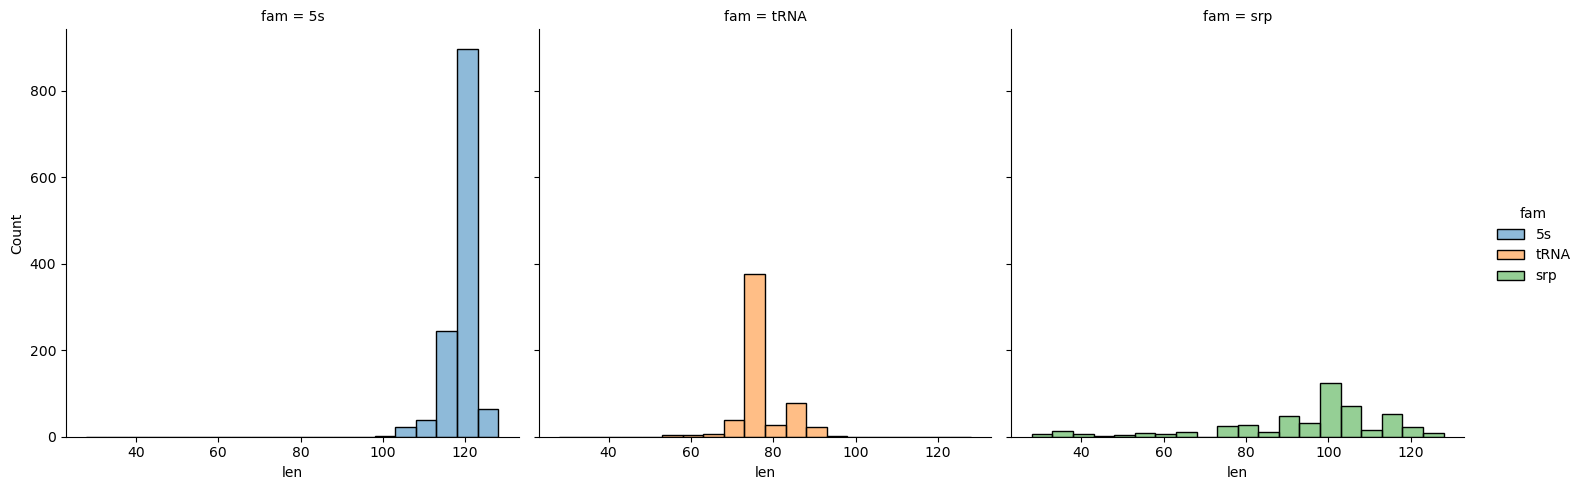

In [29]:
sns.displot(data=df_, x="len", hue="fam", col="fam")

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

def run_kfold(dataset_path, k=5, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, batch_size=4, max_len=128):
    assert train_ratio + val_ratio + test_ratio == 1.0, "La suma de las proporciones debe ser 1.0"

    data = pd.read_csv(dataset_path)
    kfold = KFold(n_splits=k, shuffle=True, random_state=42 )

    for fold, (train_val_idx, test_idx) in enumerate(kfold.split(data)):
        # Divide train+val y test
        train_val_data = data.iloc[train_val_idx]
        test_data = data.iloc[test_idx]
        
        # Divide train y val dentro del conjunto train_val
        train_data, val_data = train_test_split(train_val_data, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)

        # Guarda las divisiones en CSV para consistencia
        train_path = f"data/ArchiveII-KFold/fold_{fold}_train.csv"
        val_path =   f"data/ArchiveII-KFold/fold_{fold}_val.csv"
        test_path =  f"data/ArchiveII-KFold/fold_{fold}_test.csv"
        
        train_data.to_csv(train_path, index=False)
        val_data.to_csv(val_path, index=False)
        test_data.to_csv(test_path, index=False)


In [6]:
run_kfold('data/ArchiveII_max_length_128.csv')

In [8]:
df = pd.read_csv('data/ArchiveII_max_length_128.csv')
df_splits = pd.read_csv('data/cdhit_split.csv')

In [14]:
df_join = pd.merge(df, df_splits, how='left', left_on='id', right_on='id')

In [ ]:
# df_join.to_csv('data/cdhit_split.csv', index=False)

In [30]:
df

,id,sequence,structure,base_pairs,len,fam
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,5s
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,5s
2,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,tRNA
3,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128,5s
4,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111,srp
...,...,...,...,...,...,...
2315,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s
2316,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114,5s
2317,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88,srp
2318,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120,5s


In [56]:
shapes = {}
for fold in range(5):
    for partition in df_join.partition.unique():
        df_join.query('fold == @fold & partition == @partition')[['id', 'sequence']].to_csv(f'data/ArchiveII-KFold/fam-similarity/{partition}_{fold}.csv')
        shapes[f'{partition}_{fold}'] = 100 * df_join.query('fold == @fold & partition == @partition')[['id', 'sequence','partition']].shape[0]/2320

In [50]:
230+1896+194


2320

In [53]:
shapes

{'test_0': 9.913793103448276,
 'train_0': 81.72413793103448,
 'valid_0': 8.362068965517242,
 'test_1': 10.818965517241379,
 'train_1': 77.84482758620689,
 'valid_1': 11.336206896551724,
 'test_2': 8.491379310344827,
 'train_2': 80.43103448275862,
 'valid_2': 11.077586206896552,
 'test_3': 10.172413793103448,
 'train_3': 77.62931034482759,
 'valid_3': 12.198275862068966,
 'test_4': 9.439655172413794,
 'train_4': 76.8103448275862,
 'valid_4': 13.75}